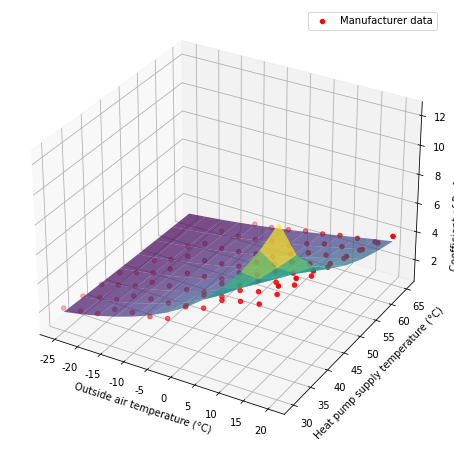

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# The COP table
COP_table = [[0,-25,-20,-15,-7,-4,-2,2,7,10,15,18,20,35],
    [30,2.08,2.26,2.45,3.12,3.30,3.39,3.65,4.83,5.12,6.02,6.33,6.53,8.09],
    [35,1.80,2.05,2.30,2.95,3.10,3.20,3.40,4.50,4.77,5.57,5.86,6.05,7.49],
    [40,1.53,1.84,2.15,2.79,2.90,3.01,3.21,4.17,4.42,5.13,5.39,5.57,6.89],
    [45,1.25,1.63,2.00,2.63,2.70,2.82,3.02,3.83,4.06,4.68,4.92,5.08,6.29],
    [50,np.nan,1.41,1.85,2.46,2.50,2.63,2.83,3.50,3.71,4.24,4.45,4.60,5.70],
    [55,np.nan,np.nan,1.70,2.30,2.30,2.43,2.63,2.78,3.36,3.79,3.99,4.12,5.10],
    [60,np.nan,np.nan,np.nan,2.14,2.10,2.24,2.44,2.50,3.00,3.35,3.52,3.63,4.50],
    [65,np.nan,np.nan,np.nan,np.nan,1.95,2.05,2.25,2.50,2.65,2.90,3.05,3.15,3.90]]

COP = pd.DataFrame(COP_table[1:], columns=COP_table[0]).T
COP.columns = COP.iloc[0]
COP = COP[1:]

# The approximated COP
def cop(T_OA, T_sup_HP):
    T_OA += 273
    T_sup_HP += 273
    return(1/(11.581585 + 0.005700*T_sup_HP - 0.086161*T_OA + 0.000140*T_OA*T_OA))
    
# Define the range of values for T_OA and T_sup_HP
T_OA_range = np.linspace(-25, 20, 13)
T_sup_HP_range = np.linspace(30, 65, 8)

# Generate a grid of T_OA and T_sup_HP values
T_OA_grid, T_sup_HP_grid = np.meshgrid(T_OA_range, T_sup_HP_range)

# Calculate the COP for each combination of T_OA and T_sup_HP
COP_values = cop(T_OA_grid, T_sup_HP_grid)

# Create a 3D plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

# Plot the surface
surface = ax.plot_surface(T_OA_grid, T_sup_HP_grid, COP_values, cmap='viridis', alpha=0.7)

# Plot the exact values
for LWT in COP.columns.to_list():
    if LWT==30: ax.scatter([x+273 for x in T_OA_range], [LWT+273 for _ in range(13)], list(COP[LWT]),color='red', label="Manufacturer data")
    else: ax.scatter([x+273 for x in T_OA_range], [LWT+273 for _ in range(13)], list(COP[LWT]),color='red')

# Add labels and title
ax.set_xlabel('Outside air temperature (°C)')
ax.set_ylabel('Heat pump supply temperature (°C)')
ax.set_zlabel('Coefficient of Performance (COP)')

ax.set_xticks(list(range(-25+273,25+273,5)))
ax.set_yticks(list(range(30+273,70+273,5)))

# Modify xtick labels to display in Celsius
xticks_celsius = ax.get_xticks() - 273
xticks_celsius_rounded = [round(x, 2) for x in xticks_celsius]
ax.set_xticklabels(xticks_celsius)

# Modify ytick labels to display in Celsius
yticks_celsius = ax.get_yticks() - 273
yticks_celsius_rounded = [round(y, 2) for y in yticks_celsius]
ax.set_yticklabels(yticks_celsius)

#fig.colorbar(surface, ax=ax, shrink=0.4, aspect=6)

# Show the plot
plt.legend()
plt.show()

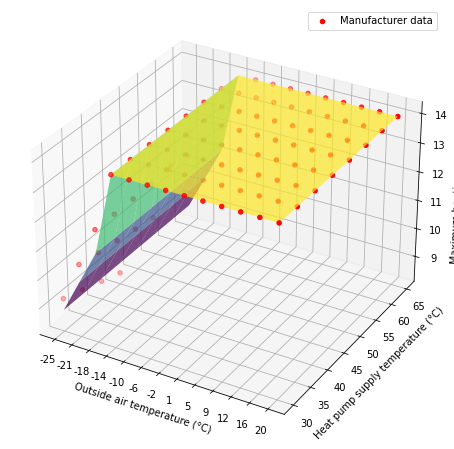

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# The Q_max table
Q_max_table = [[0,-25,-20,-15,-7,-4,-2,2,7,10,15,18,20,35],
      [30,9250,10630,12000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000],
      [35,9000,10500,12000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000],
      [45,8500,10250,12000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000],
      [40,8750,10380,12000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000],
      [50,np.nan,10130,12000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000],
      [55,np.nan,11500,12000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000],
      [60,np.nan,np.nan,np.nan,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000],
      [65,np.nan,np.nan,np.nan,np.nan,14000,14000,14000,14000,14000,14000,14000,14000,14000]]

Q_max = pd.DataFrame(Q_max_table[1:], columns=Q_max_table[0]).T
Q_max.columns = Q_max.iloc[0]
Q_max = Q_max[1:] / 1000  # Convert W to kW

# The approximated Q_max
def qmax(T_OA, T_sup_HP):
    if T_OA <= -15:
        return(-68851.589041 + (T_OA+273) * 313.315068)
    else:
        return 14000
        
# Define the range of values for T_OA and T_sup_HP
T_OA_range = np.linspace(-25, 20, 13)
T_sup_HP_range = np.linspace(30, 65, 8)

# Generate a grid of T_OA and T_sup_HP values
T_OA_grid, T_sup_HP_grid = np.meshgrid(T_OA_range, T_sup_HP_range)

# Calculate the Q_max for each combination of T_OA and T_sup_HP
Q_max_values = np.vectorize(qmax)(T_OA_grid, T_sup_HP_grid) / 1000

# Create a 3D plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

# Plot the surface
surface = ax.plot_surface(T_OA_grid, T_sup_HP_grid, Q_max_values, cmap='viridis', alpha=0.7)

# Plot the exact values
for LWT in Q_max.columns.to_list():
    if LWT==30: ax.scatter(T_OA_range, [LWT for _ in range(13)], list(Q_max[LWT]), color='red', label="Manufacturer data")
    else: ax.scatter(T_OA_range, [LWT for _ in range(13)], list(Q_max[LWT]), color='red')

# Add labels and title
ax.set_xlabel('Outside air temperature (°C)')
ax.set_ylabel('Heat pump supply temperature (°C)')
ax.set_zlabel('Maximum heating power (kW)')

ax.set_xticks(T_OA_range)
ax.set_yticks(T_sup_HP_range)

# Modify xtick labels to display in Celsius
ax.set_xticklabels([f'{round(x)}' for x in T_OA_range])
# Modify ytick labels to display in Celsius
ax.set_yticklabels([f'{round(y)}' for y in T_sup_HP_range])

# Show the plot
plt.legend()
plt.show()